# Uczenie maszynowe <br> Zadanie domowe nr 1: Klasyfikacja wektorów nośnych i regresja logistyczna - z elementami konkursu
Politechnika Gdańska, Wydział ETI, Katedra Inżynierii Biomedycznej

# Cel:
Opracować procedurę złożoną z przetwarzania wstępnego oraz klasyfikacji danych z wykorzystaniem sieci neuronowych (uwaga - jedynie MLP - bez CNN, itp.) w celu uzyskania jak najlepszych wyników klasyfikacji dla zadanego zbioru danych.

# Problem:
Dla zbioru CIFAR-10 należy wybrać przykłady dla wskazanych 3 klas. Następnie opracować procedurę w celu uzyskania najlepszych wyników klasyfikacji mierzonych z użyciem miary F1-score, F1 = 2(recall*precision)/(recall+precision). Do wyznaczenia wartości miary należy zastosować funkcję f1_score z pakietu scikit-learn (from sklearn.metrics import f1_score).

# Dane studentów
10.05.2021 <br>
Inżynieria biomedyczna, Sztuczna inteligencja gr. 1 <br>
Patrycja Gładkowska 171951 <br>
Szymon Sadowski 165298

In [1]:
# Download data and select classes 'plane', 'cat', 'truck'

import random
from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


indexes = [0, 3, 9]

idx_train = np.array([idx for idx in range(y_train.shape[0]) if y_train[idx] in indexes])
idx_test = np.array([idx for idx in range(y_test.shape[0]) if y_test[idx] in indexes])

x_train = X_train[idx_train]
y_train = y_train[idx_train]

x_test = X_test[idx_test]
y_test = y_test[idx_test]

In [2]:
# Preprocessing
epochs = 200
batch_size = 32
nb_classes = 10

# Reshape data
X_train = x_train.reshape(-1, 32 * 32 * 3)
X_test = x_test.reshape(-1, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [3]:
# Classification

# MLP
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# training
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

Epoch 45/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4626 - accuracy: 0.8189 - val_loss: 0.5218 - val_accuracy: 0.7830
Epoch 46/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4792 - accuracy: 0.8070 - val_loss: 0.5298 - val_accuracy: 0.7847
Epoch 47/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4710 - accuracy: 0.8133 - val_loss: 0.5169 - val_accuracy: 0.7973
Epoch 48/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4640 - accuracy: 0.8193 - val_loss: 0.5155 - val_accuracy: 0.7943
Epoch 49/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4601 - accuracy: 0.8240 - val_loss: 0.5306 - val_accuracy: 0.7897
Epoch 50/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4523 - accuracy: 0.8214 - val_loss: 0.5228 - val_accuracy: 0.7920
Epoch 51/200
469/469 [==============================] - 5s 11ms/step - loss: 0.4551 - accuracy: 0.8205 - val_loss: 0.5129 - val_ac

469/469 [==============================] - 5s 11ms/step - loss: 0.3899 - accuracy: 0.8539 - val_loss: 0.5190 - val_accuracy: 0.7997
Epoch 102/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3723 - accuracy: 0.8549 - val_loss: 0.5088 - val_accuracy: 0.8013
Epoch 103/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3810 - accuracy: 0.8536 - val_loss: 0.5349 - val_accuracy: 0.7843
Epoch 104/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3821 - accuracy: 0.8543 - val_loss: 0.5275 - val_accuracy: 0.7983
Epoch 105/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3651 - accuracy: 0.8611 - val_loss: 0.5434 - val_accuracy: 0.7900
Epoch 106/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3757 - accuracy: 0.8580 - val_loss: 0.5970 - val_accuracy: 0.7727
Epoch 107/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3942 - accuracy: 0.8477 - val_loss: 0.5481 - val_accuracy:

469/469 [==============================] - 5s 11ms/step - loss: 0.3349 - accuracy: 0.8730 - val_loss: 0.5322 - val_accuracy: 0.7927
Epoch 158/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3316 - accuracy: 0.8715 - val_loss: 0.5238 - val_accuracy: 0.8070
Epoch 159/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3306 - accuracy: 0.8778 - val_loss: 0.5655 - val_accuracy: 0.7947
Epoch 160/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3571 - accuracy: 0.8609 - val_loss: 0.5780 - val_accuracy: 0.8050
Epoch 161/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3366 - accuracy: 0.8698 - val_loss: 0.5788 - val_accuracy: 0.7983
Epoch 162/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3531 - accuracy: 0.8663 - val_loss: 0.5756 - val_accuracy: 0.7957
Epoch 163/200
469/469 [==============================] - 5s 11ms/step - loss: 0.3469 - accuracy: 0.8647 - val_loss: 0.5739 - val_accuracy:

In [4]:
# # saving the model
# model.save('./MyModel_tf',save_format='tf')

# # loading the saved model
# loaded_model = tf.keras.models.load_model('./MyModel_tf')

# # retraining the model
# epochs = 30
# loaded_model.fit(X_train, Y_train,
#                  batch_size=batch_size,
#                  epochs=epochs,
#                  verbose=1,
#                  validation_data=(X_test, Y_test))

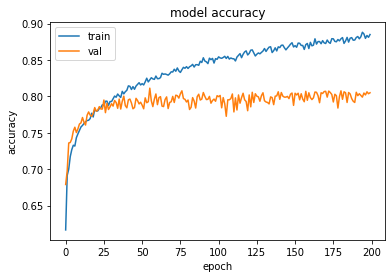

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

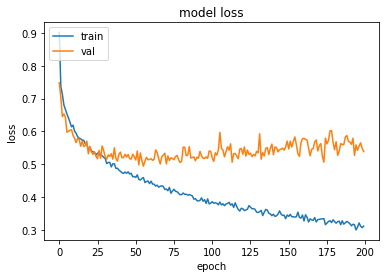

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
# Metrics

Y_pred = model.predict(X_test, verbose=2)

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Loss:, {loss}")
print(f"Accuracy: {acc}")

print("Confusion matrix:")
conf_matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(conf_matrix)

f1_score = f1_score(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), average="weighted")
print(f"F1 score: {f1_score}")

print("Classification report:")
target_names = ['plane', 'cat', 'truck']
classification_report = classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=target_names)
print(classification_report)

94/94 - 0s
Loss:, 0.5385456681251526
Accuracy: 0.8050000071525574
Confusion matrix:
[[782 122  96]
 [ 70 872  58]
 [105 134 761]]
F1 score: 0.804503120713391
Classification report:
              precision    recall  f1-score   support

       plane       0.82      0.78      0.80      1000
         cat       0.77      0.87      0.82      1000
       truck       0.83      0.76      0.79      1000

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.80      3000
weighted avg       0.81      0.81      0.80      3000



In [8]:
# Extra validation

In [9]:
# enter your data
# X_test = ''
# Y_test = ''

# Y_pred = model.predict(X_test, verbose=2)

# loss, acc = model.evaluate(X_test, Y_test, verbose=0)
# print('Loss:', loss)
# print(f"Accuracy: {acc}")

# print("Confusion matrix:")
# conf_matrix_test = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
# print(conf_matrix_test)

# f1_score_test = f1_score(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), average="weighted")
# print(f"F1 score: {f1_score_test}")

# print("Classification report:")
# target_names = ['plane', 'cat', 'truck']
# classification_report_test = classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=target_names)
# print(classification_report_test)